<a href="https://colab.research.google.com/github/vitroid/PythonTutorials/blob/master/Pending/Mechanics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# シミュレーション

Google Colab上でのアニメーションの練習も兼ねて、力学シミュレーションをやってみる。


## 1. バネで固定された質点

1. 質点(質量$m$)の平衡位置を$x=0$とする。
2. 質点の速度を$v$とする。
3. 平衡位置からの距離に比例し、反力を受ける。反力の比例定数は$k$。式に書くと、$F=-kx$.
4. 運動方程式は$F=ma=m{d^2x\over dt^2}$。これを数値的に解く。二階微分は、一階微分に分解する。
   $$F = m{dv\over dt}$$
   $$v={dx\over dt}$$
   さらに微分を差分に書きかえる(近似)。
   $$F(t)/m = {v(t+\Delta t) - v(t)\over \Delta t}$$
   $$v(t) = {x(t+\Delta t) - x(t)\over \Delta t}$$
   順番を入れかえると、未来の位置や速度を、現在の位置や速度から計算できる。
   $$v(t+\Delta t) = v(t)+F(t)\Delta t/m$$
   $$x(t+\Delta t) = x(t)+v(t)\Delta t$$


In [12]:
# 質量
m = 1.0

# バネ定数
k = 1.0

# 時刻0での位置
x = 0.0

# 時刻0での速度
v = 1.0

# 微小時間
dt = 0.01

xs = []
vs = []
ts = []
# 3000 ステップのシミュレーション
for i in range(3000):

    # その瞬間に加わる力Fを計算する
    F = -k*x

    # 力がわかると、速度が更新できる。
    v, x = v + F*dt/m, x + v*dt

    # 時刻と位置と速度を記録
    ts.append(i*dt)
    xs.append(x)
    vs.append(v)


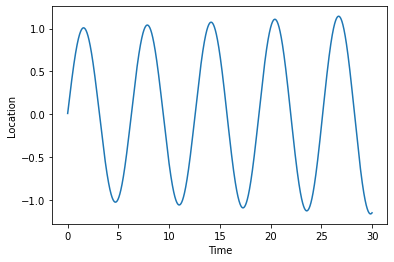

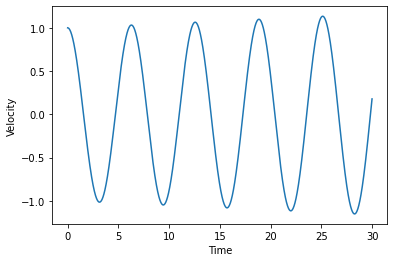

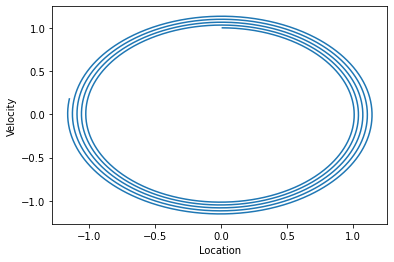

In [13]:
import matplotlib.pyplot as plt

plt.xlabel("Time")
plt.ylabel("Location")
plt.plot(ts, xs)
plt.show()

plt.xlabel("Time")
plt.ylabel("Velocity")
plt.plot(ts, vs)
plt.show()

plt.xlabel("Location")
plt.ylabel("Velocity")
plt.plot(xs, vs)
plt.show()


位相空間で見ると、ほぼ円軌道が得られているが、誤差が蓄積するせいで、微妙に半径が大きくなっていることが見てとれる。

誤差の蓄積の原因は、微分を差分で近似した時に、位相空間内の微小体積が変化してしまっているため。これを回避するために、計算順序をすこし工夫する。(詳しくは https://ja.wikipedia.org/wiki/シンプレクティック数値積分法 )

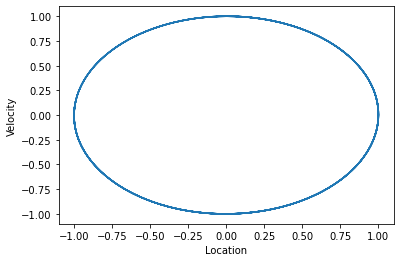

In [14]:
# 質量
m = 1.0

# バネ定数
k = 1.0

# 時刻0での位置
x = 0.0

# 時刻0での速度
v = 1.0

# 微小時間
dt = 0.01

xs = []
vs = []
ts = []
# 3000 ステップのシミュレーション
for i in range(3000):

    # その瞬間に加わる力Fを計算する
    F = -k*x

    # 力がわかると、速度が更新できる。
    v = v + F*dt/m
    x = x + v*dt

    # 時刻と位置と速度を記録
    ts.append(i*dt)
    xs.append(x)
    vs.append(v)

plt.xlabel("Location")
plt.ylabel("Velocity")
plt.plot(xs, vs)
plt.show()

エネルギー保存則が成りたっていることを確認する。

速度エネルギーは$E_k={1\over 2}mv^2$、ポテンシャルエネルギーは、この場合ではバネのエネルギーなので、$E_p={1\over 2}kx^2$となる。


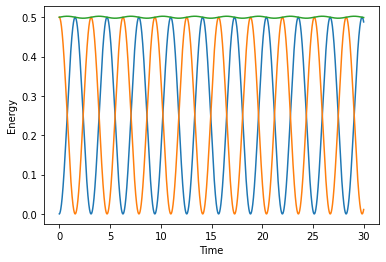

In [15]:
# 何度も書きなおすのは面倒なので、関数定義してしまおう。

def spring(m=1.0, k=1.0, x=0.0, v=1.0, dt=0.01, steps=3000):
    xs = []
    vs = []
    ts = []
    # 3000 ステップのシミュレーション
    for i in range(steps):

        # その瞬間に加わる力Fを計算する
        F = -k*x

        # 力がわかると、速度が更新できる。
        v = v + F*dt/m
        x = x + v*dt

        # 時刻と位置と速度を記録
        ts.append(i*dt)
        xs.append(x)
        vs.append(v)
    return ts, xs, vs

import numpy as np

m = 1.0
k = 1.0
ts, xs, vs = spring(m=m, k=k)
ts = np.array(ts)
xs = np.array(xs)
vs = np.array(vs)

Ek = m*vs**2 / 2
Ep = k*xs**2 / 2

plt.xlabel("Time")
plt.ylabel("Energy")
plt.plot(ts, Ep)
plt.plot(ts, Ek)
plt.plot(ts, Ep+Ek)
plt.show()

全エネルギーが(ほぼ)一定になっているのがわかる。(微小な変動は、数値積分による誤差)

最後に、質点の位置をアニメーションで表示してみる。

https://colab.research.google.com/github/jckantor/CBE30338/blob/master/docs/A.03-Animation-in-Jupyter-Notebooks.ipynb#scrollTo=6y6FqC9SwlKF

まず、n番目のフレームを描く関数を定義する。

(<matplotlib.lines.Line2D at 0x7feb80707f50>,)

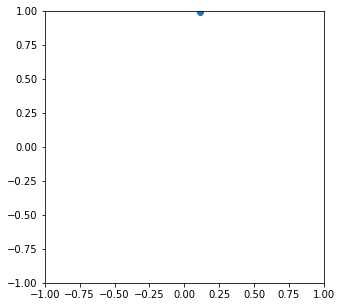

In [32]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()   

# 空のプロットを作る。あとでデータをさしこむ。
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
pt, = ax.plot([], [], 'o')

def drawframe(n):
    # データの差し込み。
    pt.set_data(xs[n*10], vs[n*10])
    return (pt,)

drawframe(1)

それをアニメーションにする関数を呼ぶ。

In [ ]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=300, interval=20, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())

## 2. 弦の振動

弦は、質点がバネでつながったもの(連成振動子)で近似できます。

連成振動には、縦波(弦の方向への振動)と横波(弦に直交する方向への振動)があります。リアルな弦をシミュレーションするなら、横波を扱ったほうが良いのですが、横波だと、質点の変位とバネの伸びの換算が面倒そうなので、ひとまず縦波を扱うことにします。

* 質点の個数を$N-1$とします。
* 質点$i$の位置を$x_i$とします。
* 質点の質量はすべて$m$とします。
* $x_0=0$, $x_N=L$は固定点とし、平衡状態では質点は等間隔になるものとします。この時、となりあう質点の平衡距離は$L/N$となります。
* 質点と質点をつなぐバネは、$L/N$を平衡長とし、それより$\Delta x$伸びると、$-k\Delta x$の反力が生じるものとします。




In [ ]:
N = 100
L = 100
k = 1.0
m = 1.0

# 初期位置は等間隔
x = np.linspace(0.0, L, N+1)
# 初速度0
v = np.zeros_like(x)

# これだと全く振動しないので、あとでそれらしい初速を与えることにする。
# とりあえず、ここでは質点1にだけ速度を与える。
v[1] = 1.0

dt = 0.01
steps = 3000

for i in range(steps):
    # 固定点0と第一質点の間のバネを0番と呼ぶことにする。
    # それぞれのバネの伸びを計算する。
    d = x[1:] - x[:-1] - L/N
    # 力を計算する。バネは両側の質点に力を及ぼす。
    F = -k * d

    # 質点は両側のバネから力を受ける。
    v[1:N-1] += dt*(F[0:N-2] - F[1:N-1])/m
    x[1:N-1] += dt*v[1:N-1]

    # 計算が正しいかどうかを確認するために、全エネルギーを計算する。
    Ep = k*(d@d) / 2
    Ek = m*(v[1:N-1]@v[1:N-1]) / 2
    print(Ep+Ek, Ep, Ek)

どんな風に動いているかよくわからないので、視覚化したい。そのために、プログラムを整理する。

In [53]:
def progress(x, v, length, m=1.0, dt=0.01, k=1.0):
    """
    速度vと位置xを1ステップだけ進める関数。
    lengthは質点間の平衡距離。
    x[0]とx[-1]は固定点とする。
    """
    N = len(x) - 1
    # 固定点0と第一質点の間のバネを0番と呼ぶことにする。
    # それぞれのバネの伸びを計算する。
    d = x[1:] - x[:-1] - length
    # 力を計算する。バネは両側の質点に力を及ぼす。
    F = -k * d

    # 質点は両側のバネから力を受ける。
    v[1:N-1] += dt*(F[0:N-2] - F[1:N-1])/m
    x[1:N-1] += dt*v[1:N-1]

N = 100
L = 100

# 初期位置は等間隔
x = np.linspace(0.0, L, N+1)
x0 = x.copy()
# 初速度0
v = np.zeros_like(x)

# これだと全く振動しないので、あとでそれらしい初速を与えることにする。
# とりあえず、ここでは質点1にだけ速度を与える。
v[1] = 1.0


全ステップ表示すると、コマが多すぎるので、10コマに1つ表示することにしよう。質点の運動の時のアニメーションの方法をそのままもってくる。

ここでは、横軸に質点の番号を、縦軸にはそれぞれの質点の、平衡位置からのずれをプロットすることにする。

(<matplotlib.lines.Line2D at 0x7feb7f36ec50>,)

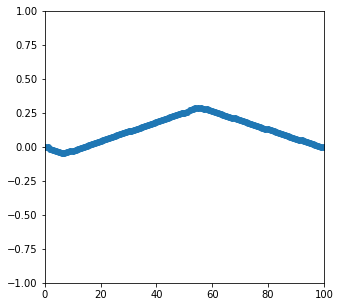

In [62]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()   

# 空のプロットを作る。あとでデータをさしこむ。
ax.set_xlim(0, L)
ax.set_ylim(-1, 1)
pt, = ax.plot([], [], 'o')

def drawframe(n):
    for i in range(10):
        progress(x, v, L/N)
    # データの差し込み。
    pt.set_data(x0, x-x0)
    return (pt,)

drawframe(1)

In [ ]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=300, interval=20, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())

想像をはるかに越える、複雑な運動になった。初期状態を、もうちょっと現実的なものにしてみる。

ギターの場合、弦の1/4の付近を弾いているように見える。そこで、初期配置として、
* 1〜N/4番目の質点は、番号に比例して正の変位を加える。
* 残りの質点$i$には、(N-i)に比例して、正の変位を加える。
という設定にする。初速は0にする。



In [65]:
N = 100
L = 100

# 平衡位置
x0 = np.linspace(0.0, L, N+1)
x = x0.copy()
x[:N//4]   += np.linspace(0, 0.5, N//4)
x[N//4:N] += np.linspace(0.5, 0.0, N*3//4)

# 初速度0
v = np.zeros_like(x)


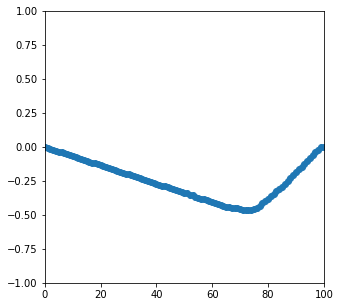

In [66]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()   

# 空のプロットを作る。あとでデータをさしこむ。
ax.set_xlim(0, L)
ax.set_ylim(-1, 1)
pt, = ax.plot([], [], 'o')

def drawframe(n):
    for i in range(100):
        progress(x, v, L/N)
    # データの差し込み。
    pt.set_data(x0, x-x0)
    return (pt,)

from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=300, interval=20, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())

弦は想像を越える形で運動していることがわかる。この振動を、実際に耳で聞いてみたい。

弦楽器は、弦そのものが音を出すことは稀で、ほとんどの弦楽器では、弦は共鳴箱につながり、弦の振動が箱を振動させることでおおきな音が出る。この場合、弦の中央部の運動のしかたは音色とは関係なく、弦の固定端に加わる力だけが音色に関与する。(エレキギターのように、弦の中央部の振動を直接音に変換する楽器もある)

固定端に加わる力は、固定端と質点1の間の距離に比例する。つまり、質点1の位置が、この弦楽器が発する音色を規定している。上のアニメーションで見ていると、質点1は周期の1/4の期間は正に、周期の3/4の期間は負の位置でほとんど止まっていて、正と負が切りかわる瞬間にすこし振動しているように見える。これを、時間に関してプロットしてよく見てみよう。

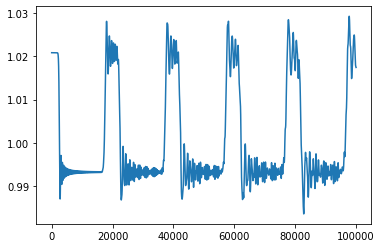

In [69]:
N = 100
L = 100

# 平衡位置
x0 = np.linspace(0.0, L, N+1)
x = x0.copy()
x[:N//4]   += np.linspace(0, 0.5, N//4)
x[N//4:N] += np.linspace(0.5, 0.0, N*3//4)

# 初速度0
v = np.zeros_like(x)

d = []
for i in range(100000):
    progress(x, v, L/N)
    d.append(x[1])

plt.plot(d)

実に複雑な運動をしていることがわかる。また、アニメーションでは定常的な運動に見えたが、波の形も徐々に変化しているのがわかる。これを実際に耳で聞いてみよう。

上のプロットから、振動の1周期がおおよそ20000ステップに相当することがわかる。
例えば、A (440 Hz)の音であれば、1秒間の音色を生成するのに880万ステップの計算が必要となる。

CDのサンプリング周波数44100 Hzにあわせ、880万ステップのデータを200ステップに一回だけ記録する。そして、得られたデータを再生してみよう。

In [70]:
N = 100
L = 100

# 平衡位置
x0 = np.linspace(0.0, L, N+1)
x = x0.copy()
x[:N//4]   += np.linspace(0, 0.5, N//4)
x[N//4:N] += np.linspace(0.5, 0.0, N*3//4)

# 初速度0
v = np.zeros_like(x)

d = []
# 1秒分のシミュレーション
for i in range(44100):
    # 200ステップ進める。
    for j in range(200):
        progress(x, v, L/N)
    # 質点1の変位を記録。
    d.append(x[1] - x0[1])

d = np.array(d)

In [80]:
# すこし減衰させる。(減衰の時定数0.5秒)
t = np.linspace(0, 1.0, 44100)
dd = d * np.exp(-t/0.5)

from IPython.display import Audio    # 音声の再生
Audio(dd, rate=44100)

ギターというよりはチェンバロっぽい音に聞こえる。おそらく、共鳴箱の役割は非常に重要で、本物っぽい音を合成するには、箱の力学まで考える必要がある。また、上の例では、指数関数をかけることで減衰を表現しているが、本来なら弦の運動方程式の中に摩擦項を組み入れるべきだ。

ヴァイオリンのように、弓で弾く弦楽器の場合は、弦を断続的に弾くようにする必要がある。


## 一次元の箱の中の電子の運動

自由粒子の運動はSchrödinger波動方程式に従う。
$$i\hbar{d\over dt}\Psi(\mathbf x)=\left({-\hbar^2\over 2m}\nabla^2+V(\mathbf x)\right)\Psi(\mathbf x)$$
一次元の場合には、
$$i\hbar{d\over dt}\Psi(x)=\left({-\hbar^2\over 2m}{d^2\over dx^2}+V(x)\right)\Psi(x)$$
とかける。

波動関数$\Psi(x)$は複素関数で、箱の壁では$\Psi(0)=\Psi(L)=0$とする。(固定端条件)

ポテンシャルエネルギー$V$がなければ、式はもっと単純に、
$$i\hbar{d\over dt}\Psi(x)={-\hbar^2\over 2m}{d^2\over dx^2}\Psi(x)$$
と書ける。

(以前、どこかで作成した覚えがあるが・・・)
